# Make Figures for second section of Results

"3.3 Linking changes in mixing and SAMW volume"

 - Figure 3 (pacemaker experiments)

## imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
import dask as da
from dask.diagnostics import ProgressBar
import gsw as gsw

# plotting packages
#import seaborn as sb
#sb.set(style='ticks')
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
from matplotlib import colors
import cmocean.cm as cmo
from cmocean.tools import lighten
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

import xesmf as xe 

wrkdir = "/expanse/lustre/projects/ciw112/pbuchanan/JRA55"
os.chdir(wrkdir)

# activate the dask progress bar
ProgressBar().register()

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


## load in the model data

In [2]:
# model output

temp = xr.open_dataset('JRA55_pic_1m_ts_1958-2022.nc')['thetao']
salt = xr.open_dataset('JRA55_pic_1m_ts_1958-2022.nc')['so']

mldSEp = xr.open_dataset('JRA55_SEPac_5d_grid_T_Y2022.nc')['mldr10_1']
mldSWp = xr.open_dataset('JRA55_SWPac_5d_grid_T_Y2022.nc')['mldr10_1']
tempSEp = xr.open_dataset('JRA55_SEPac_1m_grid_T_Y2022.nc')['thetao']
saltSEp = xr.open_dataset('JRA55_SEPac_1m_grid_T_Y2022.nc')['so']
tempSWp = xr.open_dataset('JRA55_SWPac_1m_grid_T_Y2022.nc')['thetao']
saltSWp = xr.open_dataset('JRA55_SWPac_1m_grid_T_Y2022.nc')['so']

mldSEi = xr.open_dataset('JRA55_SEInd_5d_grid_T_Y2022.nc')['mldr10_1']
mldSWi = xr.open_dataset('JRA55_SWInd_5d_grid_T_Y2022.nc')['mldr10_1']
tempSEi = xr.open_dataset('JRA55_SEInd_1m_grid_T_Y2022.nc')['thetao']
saltSEi = xr.open_dataset('JRA55_SEInd_1m_grid_T_Y2022.nc')['so']
tempSWi = xr.open_dataset('JRA55_SWInd_1m_grid_T_Y2022.nc')['thetao']
saltSWi = xr.open_dataset('JRA55_SWInd_1m_grid_T_Y2022.nc')['so']


deps = tempSEp['deptht']

# grab the volume of grid cells on the tracer grid
data = xr.open_dataset('ORCA2.0.full_grid.nc')
lons = data['lon']
lats = data['lat']
lons_bnds = data['bounds_lon']
lats_bnds = data['bounds_lat']

data = xr.open_dataset('ORCA2_xyz_grid_T.nc')
dxt = data['e1t']
dyt = data['e2t']
dzt = data['e3t']
volume = dxt * dyt * dzt
area = dxt * dyt

data.close()



## rename some dimensions/coordinates

In [3]:

month = np.arange(1,13,1)
year = np.arange(1958.5,2022.51,1)

temp = temp.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})
salt = salt.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})

mldSEp = mldSEp.rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'time'})
mldSWp = mldSWp.rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'time'})
mldSEi = mldSEi.rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'time'})
mldSWi = mldSWi.rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'time'})

tempSEp = tempSEp.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
saltSEp = saltSEp.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
tempSWp = tempSWp.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
saltSWp = saltSWp.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
tempSEi = tempSEi.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
saltSEi = saltSEi.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
tempSWi = tempSWi.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
saltSWi = saltSWi.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})

volume = volume.rename({"deptht":"depth"})



## chunk the datasets

In [4]:
chunky = {'year':1, 'month':1, 'depth':31, 'y':149, 'x':182}
temp = temp.chunk(chunks=chunky).drop_vars('time_centered')
salt = salt.chunk(chunks=chunky).drop_vars('time_centered')

chunky = {'month':1, 'depth':31, 'y':149, 'x':182}
mldSEp = mldSEp.drop_vars('time_centered')
mldSWp = mldSWp.drop_vars('time_centered')
tempSEp = tempSEp.chunk(chunks=chunky).drop_vars('time_centered')
saltSEp = saltSEp.chunk(chunks=chunky).drop_vars('time_centered')
tempSWp = tempSWp.chunk(chunks=chunky).drop_vars('time_centered')
saltSWp = saltSWp.chunk(chunks=chunky).drop_vars('time_centered')

mldSEi = mldSEi.drop_vars('time_centered')
mldSWi = mldSWi.drop_vars('time_centered')
tempSEi = tempSEi.chunk(chunks=chunky).drop_vars('time_centered')
saltSEi = saltSEi.chunk(chunks=chunky).drop_vars('time_centered')
tempSWi = tempSWi.chunk(chunks=chunky).drop_vars('time_centered')
saltSWi = saltSWi.chunk(chunks=chunky).drop_vars('time_centered')


## make new depth to regrid to and also the new volumes of the cells

100 100


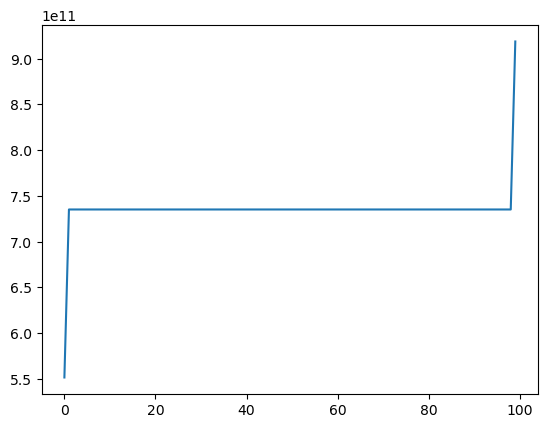

In [5]:
new_depth = np.arange(5,2001,20)
new_depth_thick = np.arange(-5,2001,20)
new_depth_thick[0] = 0; new_depth_thick[-1] = 2000; 
new_depth_thick = np.diff(new_depth_thick)
print(len(new_depth), len(new_depth_thick))

new_depth_thick = new_depth_thick[:, np.newaxis, np.newaxis]
new_depth_thick = np.broadcast_to(new_depth_thick, (100,149,182))

dep_thick = xr.DataArray(
    new_depth_thick,
    dims=["depth", "y", "x"],
    coords={"depth": new_depth, "x":area.x, "y":area.y}
    )

vol = area.expand_dims({"depth": dep_thick.depth})
vol = vol * dep_thick

plt.figure()
plt.plot(vol.isel(x=40, y=49))


## regrid the depth coordinate to finer resolution in the upper 2000 metres

[########################################] | 100% Completed | 101.51 ms
[########################################] | 100% Completed | 100.95 ms
[########################################] | 100% Completed | 100.83 ms
[########################################] | 100% Completed | 100.76 ms
[########################################] | 100% Completed | 100.76 ms
[########################################] | 100% Completed | 100.73 ms
[########################################] | 100% Completed | 100.72 ms
[########################################] | 100% Completed | 100.72 ms
[########################################] | 100% Completed | 100.78 ms
[########################################] | 100% Completed | 100.73 ms
[########################################] | 100% Completed | 100.84 ms
[########################################] | 100% Completed | 100.74 ms
[########################################] | 100% Completed | 100.73 ms
[########################################] | 100% Completed | 10

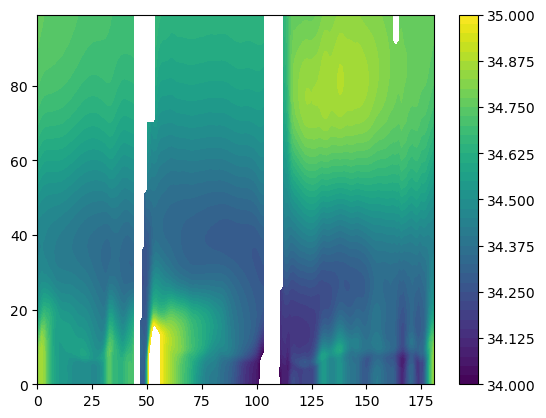

In [6]:
%%time

temp_lin = temp.where(salt>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
salt_lin = salt.where(salt>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
temp = temp.where(salt>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
salt = salt.where(salt>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
temp = temp.where(~np.isnan(salt),other=0.0).isel(depth=slice(0,25))
salt = salt.where(~np.isnan(salt),other=0.0).isel(depth=slice(0,25))
temp_cub = temp.interp(depth=new_depth, method='cubic').where(salt_lin>0.0, other=np.nan)
salt_cub = salt.interp(depth=new_depth, method='cubic').where(salt_lin>0.0, other=np.nan)

tempSEp_lin = tempSEp.where(saltSEp>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
saltSEp_lin = saltSEp.where(saltSEp>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
tempSWp_lin = tempSWp.where(saltSWp>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
saltSWp_lin = saltSWp.where(saltSWp>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')

tempSEp = tempSEp.where(saltSEp>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
saltSEp = saltSEp.where(saltSEp>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
tempSWp = tempSWp.where(saltSWp>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
saltSWp = saltSWp.where(saltSWp>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')

tempSEp = tempSEp.where(~np.isnan(saltSEp),other=0.0).isel(depth=slice(0,25))
saltSEp = saltSEp.where(~np.isnan(saltSEp),other=0.0).isel(depth=slice(0,25))
tempSWp = tempSWp.where(~np.isnan(saltSWp),other=0.0).isel(depth=slice(0,25))
saltSWp = saltSWp.where(~np.isnan(saltSWp),other=0.0).isel(depth=slice(0,25))

tempSEp_cub = tempSEp.interp(depth=new_depth, method='cubic').where(saltSEp_lin>0.0, other=np.nan)
saltSEp_cub = saltSEp.interp(depth=new_depth, method='cubic').where(saltSEp_lin>0.0, other=np.nan)
tempSWp_cub = tempSWp.interp(depth=new_depth, method='cubic').where(saltSWp_lin>0.0, other=np.nan)
saltSWp_cub = saltSWp.interp(depth=new_depth, method='cubic').where(saltSWp_lin>0.0, other=np.nan)

plt.figure()
p1 = plt.contourf(saltSEp_cub.isel(month=7,y=40), levels=np.arange(34.0,35.01,0.025))
plt.colorbar(p1)


[########################################] | 100% Completed | 100.91 ms
[########################################] | 100% Completed | 100.76 ms
[########################################] | 100% Completed | 100.55 ms
[########################################] | 100% Completed | 100.73 ms
[########################################] | 100% Completed | 100.80 ms
[########################################] | 100% Completed | 100.74 ms
[########################################] | 100% Completed | 100.64 ms
[########################################] | 100% Completed | 100.72 ms
[########################################] | 100% Completed | 101.13 ms
[########################################] | 100% Completed | 100.58 ms
[########################################] | 100% Completed | 100.99 ms
[########################################] | 100% Completed | 100.72 ms
[########################################] | 100% Completed | 100.59 ms
[########################################] | 100% Completed | 10

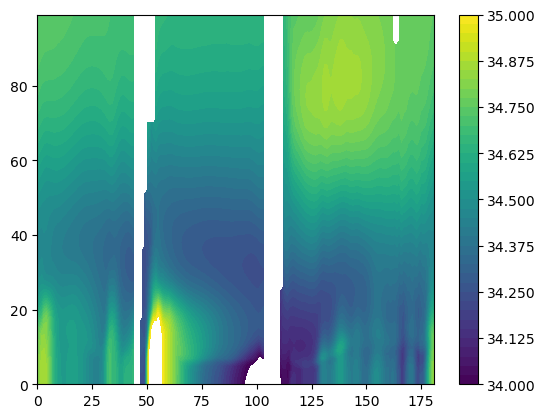

In [7]:
%%time

tempSEi_lin = tempSEi.where(saltSEi>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
saltSEi_lin = saltSEi.where(saltSEi>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
tempSWi_lin = tempSWi.where(saltSWi>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')
saltSWi_lin = saltSWi.where(saltSWi>0.0, other=np.nan).isel(depth=slice(0,25)).interp(depth=new_depth, method='linear')

tempSEi = tempSEi.where(saltSEi>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
saltSEi = saltSEi.where(saltSEi>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
tempSWi = tempSWi.where(saltSWi>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')
saltSWi = saltSWi.where(saltSWi>0.0, other=np.nan).interpolate_na(dim='x', method='linear').interpolate_na(dim='y', method='linear').interpolate_na(dim='depth', method='linear')

tempSEi = tempSEi.where(~np.isnan(saltSEi),other=0.0).isel(depth=slice(0,25))
saltSEi = saltSEi.where(~np.isnan(saltSEi),other=0.0).isel(depth=slice(0,25))
tempSWi = tempSWi.where(~np.isnan(saltSWi),other=0.0).isel(depth=slice(0,25))
saltSWi = saltSWi.where(~np.isnan(saltSWi),other=0.0).isel(depth=slice(0,25))

tempSEi_cub = tempSEi.interp(depth=new_depth, method='cubic').where(saltSEi_lin>0.0, other=np.nan)
saltSEi_cub = saltSEi.interp(depth=new_depth, method='cubic').where(saltSEi_lin>0.0, other=np.nan)
tempSWi_cub = tempSWi.interp(depth=new_depth, method='cubic').where(saltSWi_lin>0.0, other=np.nan)
saltSWi_cub = saltSWi.interp(depth=new_depth, method='cubic').where(saltSWi_lin>0.0, other=np.nan)

plt.figure()
p1 = plt.contourf(saltSEi_cub.isel(month=7,y=40), levels=np.arange(34.0,35.01,0.025))
plt.colorbar(p1)


## calculate the density

In [8]:
rho0_lin = gsw.density.sigma0(salt_lin, temp_lin)
rho0_cub = gsw.density.sigma0(salt_cub, temp_cub)
rho0SEp_cub = gsw.density.sigma0(saltSEp_cub, tempSEp_cub)
rho0SWp_cub = gsw.density.sigma0(saltSWp_cub, tempSWp_cub)
rho0SEi_cub = gsw.density.sigma0(saltSEi_cub, tempSEi_cub)
rho0SWi_cub = gsw.density.sigma0(saltSWi_cub, tempSWi_cub)

# mask rho0 where there are zeros
rho0_lin = rho0_lin.where(rho0_lin > 0.0, other=np.nan)
rho0_cub = rho0_cub.where(rho0_cub > 0.0, other=np.nan)
rho0SEp_cub = rho0SEp_cub.where(rho0SEp_cub > 0.0, other=np.nan)
rho0SWp_cub = rho0SWp_cub.where(rho0SWp_cub > 0.0, other=np.nan)
rho0SEi_cub = rho0SEi_cub.where(rho0SEi_cub > 0.0, other=np.nan)
rho0SWi_cub = rho0SWi_cub.where(rho0SWi_cub > 0.0, other=np.nan)


[########################################] | 100% Completed | 101.07 ms
[########################################] | 100% Completed | 100.94 ms
[########################################] | 100% Completed | 100.88 ms
[########################################] | 100% Completed | 100.58 ms
[########################################] | 100% Completed | 108.55 ms
[########################################] | 100% Completed | 100.64 ms
[########################################] | 100% Completed | 100.69 ms
[########################################] | 100% Completed | 100.84 ms
[########################################] | 100% Completed | 100.65 ms
[########################################] | 100% Completed | 100.63 ms
[########################################] | 100% Completed | 100.86 ms
[########################################] | 100% Completed | 100.67 ms


## vertical gradient in potential density

In [9]:
%%time

dpdz_lin = rho0_lin.differentiate('depth')
dpdz_cub = rho0_cub.differentiate('depth')

dpdzSEp_cub = rho0SEp_cub.differentiate('depth')
dpdzSWp_cub = rho0SWp_cub.differentiate('depth')

dpdzSEi_cub = rho0SEi_cub.differentiate('depth')
dpdzSWi_cub = rho0SWi_cub.differentiate('depth')


CPU times: user 26 ms, sys: 898 μs, total: 26.9 ms
Wall time: 26.8 ms


## calculate the "thermostad", the change in depth per degree C


-101.99998 -44.646076
[########################################] | 100% Completed | 1.73 sms
[########################################] | 100% Completed | 1.77 sms
[########################################] | 100% Completed | 1.72 sms
[########################################] | 100% Completed | 1.47 sms
CPU times: user 6.19 s, sys: 2.2 s, total: 8.39 s
Wall time: 6.78 s


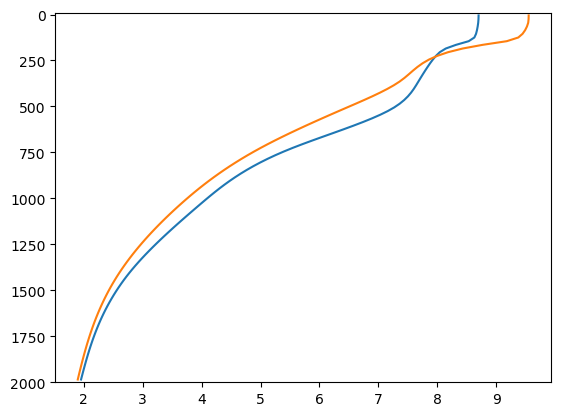

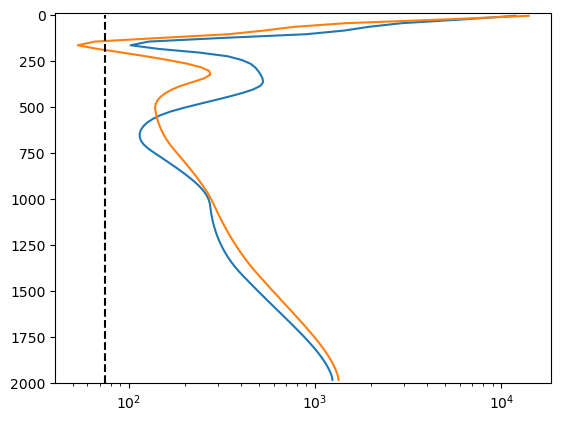

In [10]:
%%time 

dtdz_cub = temp_cub.differentiate('depth')
dzdt_cub = np.abs(1.0/dtdz_cub)

dtdzSEp_cub = tempSEp_cub.differentiate('depth')
dzdtSEp_cub = np.abs(1.0/dtdzSEp_cub)
dtdzSWp_cub = tempSWp_cub.differentiate('depth')
dzdtSWp_cub = np.abs(1.0/dtdzSWp_cub)

dtdzSEi_cub = tempSEi_cub.differentiate('depth')
dzdtSEi_cub = np.abs(1.0/dtdzSEi_cub)
dtdzSWi_cub = tempSWi_cub.differentiate('depth')
dzdtSWi_cub = np.abs(1.0/dtdzSWi_cub)

xx = 90; yy = 40
print(tempSEp_cub.coords['lon'].isel(x=xx,y=yy).values, tempSEp_cub.coords['lat'].isel(x=xx,y=yy).values)

plt.figure()
plt.plot(tempSEp_cub.isel(month=7,x=xx,y=yy), tempSEp_cub.coords['depth'])
plt.plot(tempSWp_cub.isel(month=7,x=xx,y=yy), tempSWp_cub.coords['depth'])
plt.ylim(2000,-10)

plt.figure()
plt.plot(np.abs(dzdtSEp_cub.isel(month=7,x=xx,y=yy)), dtdzSEp_cub.coords['depth'])
plt.plot(np.abs(dzdtSWp_cub.isel(month=7,x=xx,y=yy)), dtdzSWp_cub.coords['depth'])
plt.ylim(2000,-10)
plt.plot((75,75), (2000,0), 'k--')
plt.xscale('log')



## get the isopycnal bounds and select grid cells belonging to SAMW

In [11]:
### set bounds for SAMW
samw_rho0_bnds = np.array([26.5, 27.1])
samw_lati_bnds = np.array([-90., -20.])
samw_dzdt_bnds = np.array([75.0])
### set bounds for AAIW
aaiw_lati_bnds = np.array([-90., -20.])
aaiw_rho0_bnds = np.array([27.1, 27.5])



In [12]:
%%time

samw_cub = rho0_cub*0 + 1.0
samw_cub = samw_cub.where(rho0_cub > samw_rho0_bnds[0], other=0.0).where(rho0_cub < samw_rho0_bnds[1], other=0.0)
samw_cub = samw_cub.where(samw_cub.coords['lat'] > samw_lati_bnds[0], other=0.0).where(samw_cub.coords['lat'] < samw_lati_bnds[1], other=0.0)
samw_cub = samw_cub.where(dzdt_cub > samw_dzdt_bnds[0], other=0.0)
samw_cub_volume = (samw_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

aaiw_cub = rho0_cub*0 + 1.0
aaiw_cub = aaiw_cub.where(rho0_cub > aaiw_rho0_bnds[0], other=0.0).where(rho0_cub < aaiw_rho0_bnds[1], other=0.0)
aaiw_cub = aaiw_cub.where(aaiw_cub.coords['lat'] > aaiw_lati_bnds[0], other=0.0).where(aaiw_cub.coords['lat'] < aaiw_lati_bnds[1], other=0.0)
aaiw_cub_volume = (aaiw_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3


CPU times: user 72.1 ms, sys: 568 μs, total: 72.6 ms
Wall time: 72.7 ms


In [13]:
%%time

samwSEp_cub = rho0SEp_cub*0 + 1.0
samwSEp_cub = samwSEp_cub.where(rho0SEp_cub > samw_rho0_bnds[0], other=0.0).where(rho0SEp_cub < samw_rho0_bnds[1], other=0.0)
samwSEp_cub = samwSEp_cub.where(samwSEp_cub.coords['lat'] > samw_lati_bnds[0], other=0.0).where(samwSEp_cub.coords['lat'] < samw_lati_bnds[1], other=0.0)
samwSEp_cub = samwSEp_cub.where(dzdtSEp_cub > samw_dzdt_bnds[0], other=0.0)
samwSEp_cub_volume = (samwSEp_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

aaiwSEp_cub = rho0SEp_cub*0 + 1.0
aaiwSEp_cub = aaiwSEp_cub.where(rho0SEp_cub > aaiw_rho0_bnds[0], other=0.0).where(rho0SEp_cub < aaiw_rho0_bnds[1], other=0.0)
aaiwSEp_cub = aaiwSEp_cub.where(aaiwSEp_cub.coords['lat'] > aaiw_lati_bnds[0], other=0.0).where(aaiwSEp_cub.coords['lat'] < aaiw_lati_bnds[1], other=0.0)
aaiwSEp_cub_volume = (aaiwSEp_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

samwSWp_cub = rho0SWp_cub*0 + 1.0
samwSWp_cub = samwSWp_cub.where(rho0SWp_cub > samw_rho0_bnds[0], other=0.0).where(rho0SWp_cub < samw_rho0_bnds[1], other=0.0)
samwSWp_cub = samwSWp_cub.where(samwSWp_cub.coords['lat'] > samw_lati_bnds[0], other=0.0).where(samwSWp_cub.coords['lat'] < samw_lati_bnds[1], other=0.0)
samwSWp_cub = samwSWp_cub.where(dzdtSWp_cub > samw_dzdt_bnds[0], other=0.0)
samwSWp_cub_volume = (samwSWp_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

aaiwSWp_cub = rho0SWp_cub*0 + 1.0
aaiwSWp_cub = aaiwSWp_cub.where(rho0SWp_cub > aaiw_rho0_bnds[0], other=0.0).where(rho0SWp_cub < aaiw_rho0_bnds[1], other=0.0)
aaiwSWp_cub = aaiwSWp_cub.where(aaiwSWp_cub.coords['lat'] > aaiw_lati_bnds[0], other=0.0).where(aaiwSWp_cub.coords['lat'] < aaiw_lati_bnds[1], other=0.0)
aaiwSWp_cub_volume = (aaiwSWp_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3



CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 139 ms


In [14]:
%%time 

samwSEi_cub = rho0SEi_cub*0 + 1.0
samwSEi_cub = samwSEi_cub.where(rho0SEi_cub > samw_rho0_bnds[0], other=0.0).where(rho0SEi_cub < samw_rho0_bnds[1], other=0.0)
samwSEi_cub = samwSEi_cub.where(samwSEi_cub.coords['lat'] > samw_lati_bnds[0], other=0.0).where(samwSEi_cub.coords['lat'] < samw_lati_bnds[1], other=0.0)
samwSEi_cub = samwSEi_cub.where(dzdtSEi_cub > samw_dzdt_bnds[0], other=0.0)
samwSEi_cub_volume = (samwSEi_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

aaiwSEi_cub = rho0SEi_cub*0 + 1.0
aaiwSEi_cub = aaiwSEi_cub.where(rho0SEi_cub > aaiw_rho0_bnds[0], other=0.0).where(rho0SEi_cub < aaiw_rho0_bnds[1], other=0.0)
aaiwSEi_cub = aaiwSEi_cub.where(aaiwSEi_cub.coords['lat'] > aaiw_lati_bnds[0], other=0.0).where(aaiwSEi_cub.coords['lat'] < aaiw_lati_bnds[1], other=0.0)
aaiwSEi_cub_volume = (aaiwSEi_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

samwSWi_cub = rho0SWi_cub*0 + 1.0
samwSWi_cub = samwSWi_cub.where(rho0SWi_cub > samw_rho0_bnds[0], other=0.0).where(rho0SWi_cub < samw_rho0_bnds[1], other=0.0)
samwSWi_cub = samwSWi_cub.where(samwSWi_cub.coords['lat'] > samw_lati_bnds[0], other=0.0).where(samwSWi_cub.coords['lat'] < samw_lati_bnds[1], other=0.0)
samwSWi_cub = samwSWi_cub.where(dzdtSWi_cub > samw_dzdt_bnds[0], other=0.0)
samwSWi_cub_volume = (samwSWi_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3

aaiwSWi_cub = rho0SWi_cub*0 + 1.0
aaiwSWi_cub = aaiwSWi_cub.where(rho0SWi_cub > aaiw_rho0_bnds[0], other=0.0).where(rho0SWi_cub < aaiw_rho0_bnds[1], other=0.0)
aaiwSWi_cub = aaiwSWi_cub.where(aaiwSWi_cub.coords['lat'] > aaiw_lati_bnds[0], other=0.0).where(aaiwSWi_cub.coords['lat'] < aaiw_lati_bnds[1], other=0.0)
aaiwSWi_cub_volume = (aaiwSWi_cub * vol).drop_vars(['nav_lon', 'nav_lat', 'time_centered'])    # m3


CPU times: user 137 ms, sys: 1.77 ms, total: 139 ms
Wall time: 139 ms


## average the start and end of the hindcast

In [15]:
samw_cub_volume_start = samw_cub_volume.isel(year=slice(0,20)).mean(dim='year')
samw_cub_volume_end = samw_cub_volume.isel(year=slice(-20,-1)).mean(dim='year')


## separate into basins


### SAMW

[########################################] | 100% Completed | 35.85 s
[########################################] | 100% Completed | 36.35 s
[########################################] | 100% Completed | 38.96 ss
[########################################] | 100% Completed | 37.11 ss
[########################################] | 100% Completed | 39.47 ss
[########################################] | 100% Completed | 37.60 ss
CPU times: user 3min 47s, sys: 2min 11s, total: 5min 58s
Wall time: 3min 45s


"\nplt.figure()\ngs = GridSpec(2,2)\nax1 = plt.subplot(gs[0,0])\nax2 = plt.subplot(gs[0,1])\nax3 = plt.subplot(gs[1,0])\nax4 = plt.subplot(gs[1,1])\np1 = ax1.contourf(samwSEp_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')\np2 = ax2.contourf(samwSWp_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')\np3 = ax3.contourf(samwSEi_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')\np4 = ax4.contourf(samwSWi_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')\nplt.colorbar(p1)\nplt.colorbar(p2)\nplt.colorbar(p3)\nplt.colorbar(p4)\n\nplt.figure()\ngs = GridSpec(2,2)\nax1 = plt.subplot(gs[0,0])\nax2 = plt.subplot(gs[0,1])\nax3 = plt.subplot(gs[1,0])\nax4 = plt.subplot(gs[1,1])\np1 = ax1.contourf(samwSEp_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')\np2 = ax2.contourf(samwSWp_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')\np3 = ax3.contourf(s

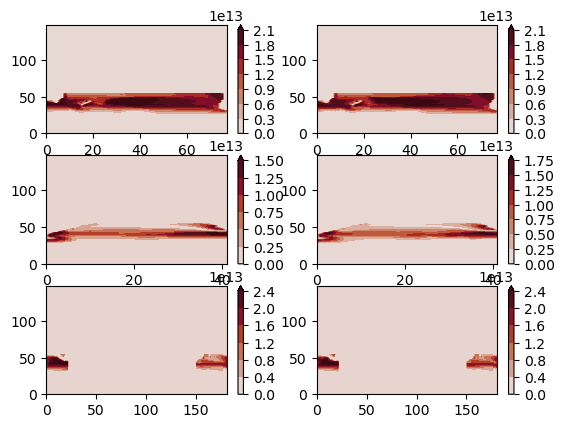

In [16]:
%%time

samw_cub_volume_start_pac = samw_cub_volume_start.isel(x=slice(30,108))
samw_cub_volume_start_atl = samw_cub_volume_start.isel(x=slice(110,152))
samw_cub_volume_start_ind = samw_cub_volume_start.where(samw_cub_volume_start.coords['lon'] < 120.0, other = 0.0).where(samw_cub_volume_start.coords['lon'] > 20.0, other = 0.0)
samw_cub_volume_end_pac = samw_cub_volume_end.isel(x=slice(30,108))
samw_cub_volume_end_atl = samw_cub_volume_end.isel(x=slice(110,152))
samw_cub_volume_end_ind = samw_cub_volume_end.where(samw_cub_volume_end.coords['lon'] < 120.0, other = 0.0).where(samw_cub_volume_end.coords['lon'] > 20.0, other = 0.0)

samwSEp_cub_volume_pac = samwSEp_cub_volume.isel(x=slice(30,108))
samwSEp_cub_volume_atl = samwSEp_cub_volume.isel(x=slice(110,152))
samwSEp_cub_volume_ind = samwSEp_cub_volume.where(samwSEp_cub_volume.coords['lon'] < 120.0, other = 0.0).where(samwSEp_cub_volume.coords['lon'] > 20.0, other = 0.0)

samwSWp_cub_volume_pac = samwSWp_cub_volume.isel(x=slice(30,108))
samwSWp_cub_volume_atl = samwSWp_cub_volume.isel(x=slice(110,152))
samwSWp_cub_volume_ind = samwSWp_cub_volume.where(samwSWp_cub_volume.coords['lon'] < 120.0, other = 0.0).where(samwSWp_cub_volume.coords['lon'] > 20.0, other = 0.0)

samwSEi_cub_volume_pac = samwSEi_cub_volume.isel(x=slice(30,108))
samwSEi_cub_volume_atl = samwSEi_cub_volume.isel(x=slice(110,152))
samwSEi_cub_volume_ind = samwSEi_cub_volume.where(samwSEi_cub_volume.coords['lon'] < 120.0, other = 0.0).where(samwSEi_cub_volume.coords['lon'] > 20.0, other = 0.0)

samwSWi_cub_volume_pac = samwSWi_cub_volume.isel(x=slice(30,108))
samwSWi_cub_volume_atl = samwSWi_cub_volume.isel(x=slice(110,152))
samwSWi_cub_volume_ind = samwSWi_cub_volume.where(samwSWi_cub_volume.coords['lon'] < 120.0, other = 0.0).where(samwSWi_cub_volume.coords['lon'] > 20.0, other = 0.0)


plt.figure()
gs = GridSpec(3,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[2,0])
ax6 = plt.subplot(gs[2,1])
p1 = ax1.contourf(samw_cub_volume_start_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p2 = ax2.contourf(samw_cub_volume_end_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p3 = ax3.contourf(samw_cub_volume_start_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p4 = ax4.contourf(samw_cub_volume_end_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p5 = ax5.contourf(samw_cub_volume_start_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p6 = ax6.contourf(samw_cub_volume_end_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)
plt.colorbar(p2)
plt.colorbar(p3)
plt.colorbar(p4)
plt.colorbar(p5)
plt.colorbar(p6)
'''
plt.figure()
gs = GridSpec(2,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
p1 = ax1.contourf(samwSEp_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p2 = ax2.contourf(samwSWp_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p3 = ax3.contourf(samwSEi_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p4 = ax4.contourf(samwSWi_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)
plt.colorbar(p2)
plt.colorbar(p3)
plt.colorbar(p4)

plt.figure()
gs = GridSpec(2,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
p1 = ax1.contourf(samwSEp_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p2 = ax2.contourf(samwSWp_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p3 = ax3.contourf(samwSEi_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p4 = ax4.contourf(samwSWi_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)
plt.colorbar(p2)
plt.colorbar(p3)
plt.colorbar(p4)

plt.figure()
gs = GridSpec(2,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
p1 = ax1.contourf(samwSEp_cub_volume_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p2 = ax2.contourf(samwSWp_cub_volume_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p3 = ax3.contourf(samwSEi_cub_volume_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
p4 = ax4.contourf(samwSWi_cub_volume_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)
plt.colorbar(p2)
plt.colorbar(p3)
plt.colorbar(p4)
'''

### AAIW

[########################################] | 100% Completed | 1.89 sms
[########################################] | 100% Completed | 1.77 sms
[########################################] | 100% Completed | 2.00 sms


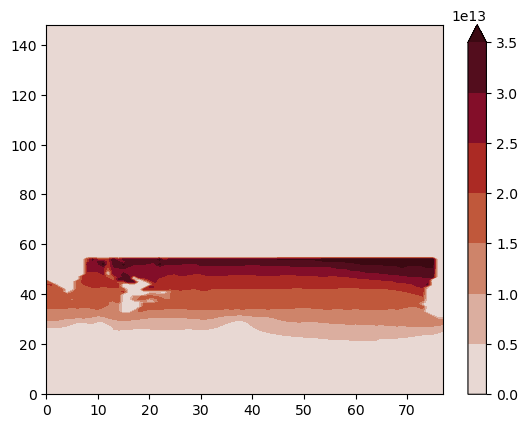

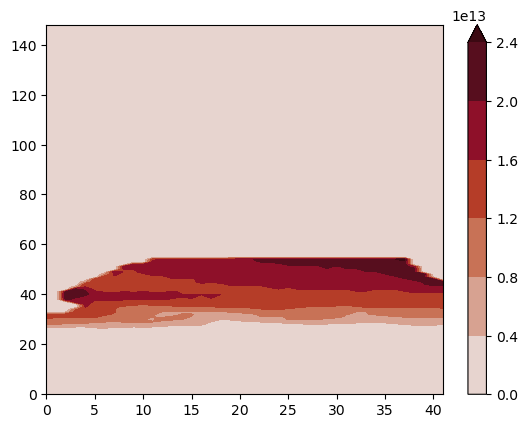

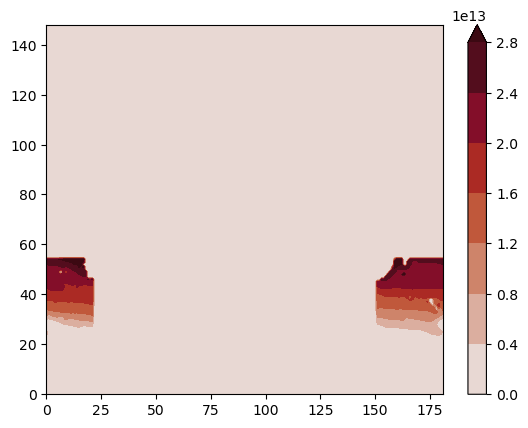

In [17]:
aaiwSEp_cub_volume_pac = aaiwSEp_cub_volume.isel(x=slice(30,108))
aaiwSEp_cub_volume_atl = aaiwSEp_cub_volume.isel(x=slice(110,152))
aaiwSEp_cub_volume_ind = aaiwSEp_cub_volume.where(aaiwSEp_cub_volume.coords['lon'] < 120.0, other = 0.0).where(aaiwSEp_cub_volume.coords['lon'] > 20.0, other = 0.0)

aaiwSWp_cub_volume_pac = aaiwSWp_cub_volume.isel(x=slice(30,108))
aaiwSWp_cub_volume_atl = aaiwSWp_cub_volume.isel(x=slice(110,152))
aaiwSWp_cub_volume_ind = aaiwSWp_cub_volume.where(aaiwSWp_cub_volume.coords['lon'] < 120.0, other = 0.0).where(aaiwSWp_cub_volume.coords['lon'] > 20.0, other = 0.0)

aaiwSEi_cub_volume_pac = aaiwSEi_cub_volume.isel(x=slice(30,108))
aaiwSEi_cub_volume_atl = aaiwSEi_cub_volume.isel(x=slice(110,152))
aaiwSEi_cub_volume_ind = aaiwSEi_cub_volume.where(aaiwSEi_cub_volume.coords['lon'] < 120.0, other = 0.0).where(aaiwSEi_cub_volume.coords['lon'] > 20.0, other = 0.0)

aaiwSWi_cub_volume_pac = aaiwSWi_cub_volume.isel(x=slice(30,108))
aaiwSWi_cub_volume_atl = aaiwSWi_cub_volume.isel(x=slice(110,152))
aaiwSWi_cub_volume_ind = aaiwSWi_cub_volume.where(aaiwSWi_cub_volume.coords['lon'] < 120.0, other = 0.0).where(aaiwSWi_cub_volume.coords['lon'] > 20.0, other = 0.0)

plt.figure()
p1 = plt.contourf(aaiwSEp_cub_volume_pac.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)

plt.figure()
p1 = plt.contourf(aaiwSEp_cub_volume_atl.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)

plt.figure()
p1 = plt.contourf(aaiwSEp_cub_volume_ind.isel(month=7).sum(dim='depth'), cmap=cmo.amp, extend='max')
plt.colorbar(p1)

In [18]:
os.getcwd()

'/expanse/lustre/projects/ciw112/pbuchanan/JRA55'

## Regrid the model volumes to regular coordinates for plotting

In [19]:
%%time

ds_out = xe.util.grid_global(1,1)

# reduce dimensions of datasets to regrid by removing time
print("removing time dimension by applying statistics")

samw_cub_volume_start = samw_cub_volume_start.mean(dim='month')
samw_cub_volume_end = samw_cub_volume_end.mean(dim='month')

mldSEp_max = mldSEp.max(dim='time')
mldSWp_max = mldSWp.max(dim='time')
samwSEp_cub_volume = samwSEp_cub_volume.mean(dim='month')
samwSWp_cub_volume = samwSWp_cub_volume.mean(dim='month')
aaiwSEp_cub_volume = aaiwSEp_cub_volume.mean(dim='month')
aaiwSWp_cub_volume = aaiwSWp_cub_volume.mean(dim='month')

mldSEi_max = mldSEi.max(dim='time')
mldSWi_max = mldSWi.max(dim='time')
samwSEi_cub_volume = samwSEi_cub_volume.mean(dim='month')
samwSWi_cub_volume = samwSWi_cub_volume.mean(dim='month')
aaiwSEi_cub_volume = aaiwSEi_cub_volume.mean(dim='month')
aaiwSWi_cub_volume = aaiwSWi_cub_volume.mean(dim='month')


removing time dimension by applying statistics
CPU times: user 44.5 ms, sys: 101 ms, total: 146 ms
Wall time: 7.31 s


In [20]:
%%time

ds_in = xr.Dataset(
    {'samw_volume_start': ( ('depth', 'y', 'x'), samw_cub_volume_start.values),
     'samw_volume_end': ( ('depth', 'y', 'x'), samw_cub_volume_end.values),
     'mldSEp_max': ( ('y', 'x'), mldSEp_max.values),
     'mldSWp_max': ( ('y', 'x'), mldSWp_max.values),
     'samwSEp_volume': ( ('depth', 'y', 'x'), samwSEp_cub_volume.values),
     'samwSWp_volume': ( ('depth', 'y', 'x'), samwSWp_cub_volume.values),
     'aaiwSEp_volume': ( ('depth', 'y', 'x'), aaiwSEp_cub_volume.values),
     'aaiwSWp_volume': ( ('depth', 'y', 'x'), aaiwSWp_cub_volume.values),
     'mldSEi_max': ( ('y', 'x'), mldSEi_max.values),
     'mldSWi_max': ( ('y', 'x'), mldSWi_max.values),
     'samwSEi_volume': ( ('depth', 'y', 'x'), samwSEi_cub_volume.values),
     'samwSWi_volume': ( ('depth', 'y', 'x'), samwSWi_cub_volume.values),
     'aaiwSEi_volume': ( ('depth', 'y', 'x'), aaiwSEi_cub_volume.values),
     'aaiwSWi_volume': ( ('depth', 'y', 'x'), aaiwSWi_cub_volume.values),
     },
    coords={"lon": (['y','x'], lons.values),
            "lat": (['y','x'], lats.values),
            "depth": (['depth'], samwSEp_cub_volume.coords['depth'].values),
            }
    )
regridder = xe.Regridder(ds_in, ds_out, 'bilinear', ignore_degenerate=True)



[########################################] | 100% Completed | 480.39 s
[########################################] | 100% Completed | 459.82 s
[########################################] | 100% Completed | 24.05 ss
[########################################] | 100% Completed | 23.00 ss
[########################################] | 100% Completed | 23.43 ss
[########################################] | 100% Completed | 23.30 ss
[########################################] | 100% Completed | 23.65 ss
[########################################] | 100% Completed | 23.61 ss
[########################################] | 100% Completed | 22.41 ss
[########################################] | 100% Completed | 22.22 ss
CPU times: user 18min 55s, sys: 11min 11s, total: 30min 7s
Wall time: 18min 48s


In [21]:
%%time

print("Regridding")

samw_volume_start_reg = regridder(ds_in['samw_volume_start'])
samw_volume_end_reg = regridder(ds_in['samw_volume_end'])
mldSEp_max_reg = regridder(ds_in['mldSEp_max'])
mldSWp_max_reg = regridder(ds_in['mldSWp_max'])
samwSEp_volume_reg = regridder(ds_in['samwSEp_volume'])
samwSWp_volume_reg = regridder(ds_in['samwSWp_volume'])
aaiwSEp_volume_reg = regridder(ds_in['aaiwSEp_volume'])
aaiwSWp_volume_reg = regridder(ds_in['aaiwSWp_volume'])
mldSEi_max_reg = regridder(ds_in['mldSEi_max'])
mldSWi_max_reg = regridder(ds_in['mldSWi_max'])
samwSEi_volume_reg = regridder(ds_in['samwSEi_volume'])
samwSWi_volume_reg = regridder(ds_in['samwSWi_volume'])
aaiwSEi_volume_reg = regridder(ds_in['aaiwSEi_volume'])
aaiwSWi_volume_reg = regridder(ds_in['aaiwSWi_volume'])


Regridding
CPU times: user 1.35 s, sys: 135 ms, total: 1.49 s
Wall time: 1.49 s


In [22]:
%%time

print("Preparation for plotting")

### top down
samw_volume_start_area = samw_volume_start_reg.sum(dim='depth')
samw_volume_end_area = samw_volume_end_reg.sum(dim='depth')
samwSEp_volume_area = samwSEp_volume_reg.sum(dim='depth')
samwSWp_volume_area = samwSWp_volume_reg.sum(dim='depth')
samwSEi_volume_area = samwSEi_volume_reg.sum(dim='depth')
samwSWi_volume_area = samwSWi_volume_reg.sum(dim='depth')

### from the front
samw_volume_start_front = samw_volume_start_reg.sum(dim='y')
samw_volume_end_front = samw_volume_end_reg.sum(dim='y')
samwSEp_volume_front = samwSEp_volume_reg.sum(dim='y')
samwSWp_volume_front = samwSWp_volume_reg.sum(dim='y')
samwSEi_volume_front = samwSEi_volume_reg.sum(dim='y')
samwSWi_volume_front = samwSWi_volume_reg.sum(dim='y')

### from the side of each basin

lons_tmp = samwSEp_volume_reg.coords['lon']
lons_tmp = lons_tmp.where(lons_tmp >0.0, other=lons_tmp+360.0)

tmp = samw_volume_start_reg.assign_coords({"lon":lons_tmp})
samw_volume_start_pacside = tmp.where(tmp.coords['lon'] > 140.0, other=0.0).where(tmp.coords['lon'] < 270.0, other=0.0).sum(dim='x')
tmp = samw_volume_end_reg.assign_coords({"lon":lons_tmp})
samw_volume_end_pacside = tmp.where(tmp.coords['lon'] > 140.0, other=0.0).where(tmp.coords['lon'] < 270.0, other=0.0).sum(dim='x')
samw_volume_start_atlside = samw_volume_start_reg.isel(x=slice(110,200)).sum(dim='x')
samw_volume_end_atlside = samw_volume_end_reg.isel(x=slice(110,200)).sum(dim='x')
samw_volume_start_indside = samw_volume_start_reg.isel(x=slice(200,320)).sum(dim='x')
samw_volume_end_indside = samw_volume_end_reg.isel(x=slice(200,320)).sum(dim='x')

tmp = samwSEp_volume_reg.assign_coords({"lon":lons_tmp})
samwSEp_volume_pacside = tmp.where(tmp.coords['lon'] > 140.0, other=0.0).where(tmp.coords['lon'] < 270.0, other=0.0).sum(dim='x')
tmp = samwSWp_volume_reg.assign_coords({"lon":lons_tmp})
samwSWp_volume_pacside = tmp.where(tmp.coords['lon'] > 140.0, other=0.0).where(tmp.coords['lon'] < 270.0, other=0.0).sum(dim='x')
samwSEp_volume_atlside = samwSEp_volume_reg.isel(x=slice(110,200)).sum(dim='x')
samwSWp_volume_atlside = samwSWp_volume_reg.isel(x=slice(110,200)).sum(dim='x')
samwSEp_volume_indside = samwSEp_volume_reg.isel(x=slice(200,320)).sum(dim='x')
samwSWp_volume_indside = samwSWp_volume_reg.isel(x=slice(200,320)).sum(dim='x')

tmp = samwSEi_volume_reg.assign_coords({"lon":lons_tmp})
samwSEi_volume_pacside = tmp.where(tmp.coords['lon'] > 140.0, other=0.0).where(tmp.coords['lon'] < 270.0, other=0.0).sum(dim='x')
tmp = samwSWi_volume_reg.assign_coords({"lon":lons_tmp})
samwSWi_volume_pacside = tmp.where(tmp.coords['lon'] > 140.0, other=0.0).where(tmp.coords['lon'] < 270.0, other=0.0).sum(dim='x')
samwSEi_volume_atlside = samwSEi_volume_reg.isel(x=slice(110,200)).sum(dim='x')
samwSWi_volume_atlside = samwSWi_volume_reg.isel(x=slice(110,200)).sum(dim='x')
samwSEi_volume_indside = samwSEi_volume_reg.isel(x=slice(200,320)).sum(dim='x')
samwSWi_volume_indside = samwSWi_volume_reg.isel(x=slice(200,320)).sum(dim='x')


### wrap the longitudes for the top-down and from-the-front arrays

samw_volume_start_area = xr.DataArray(
    samw_volume_start_area,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samw_volume_end_area = xr.DataArray(
    samw_volume_end_area,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samw_volume_start_front = xr.DataArray(
    samw_volume_start_front,
    dims=("depth", "x"),
    coords={"depth": (['depth'], samw_volume_start_front.coords['depth'].values),
            "lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            }
    )
samw_volume_end_front = xr.DataArray(
    samw_volume_end_front,
    dims=("depth", "x"),
    coords={"depth": (['depth'], samw_volume_end_front.coords['depth'].values),
            "lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            }
    )

mldSEp_max = xr.DataArray(
    mldSEp_max_reg,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
mldSWp_max = xr.DataArray(
    mldSWp_max_reg,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samwSEp_volume_area = xr.DataArray(
    samwSEp_volume_area,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samwSWp_volume_area = xr.DataArray(
    samwSWp_volume_area,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samwSEp_volume_front = xr.DataArray(
    samwSEp_volume_front,
    dims=("depth", "x"),
    coords={"depth": (['depth'], samwSEp_volume_front.coords['depth'].values),
            "lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            }
    )
samwSWp_volume_front = xr.DataArray(
    samwSWp_volume_front,
    dims=("depth", "x"),
    coords={"depth": (['depth'], samwSWp_volume_front.coords['depth'].values),
            "lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            }
    )

### wrap the longitudes for the top-down and from-the-front arrays
mldSEi_max = xr.DataArray(
    mldSEi_max_reg,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
mldSWi_max = xr.DataArray(
    mldSWi_max_reg,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samwSEi_volume_area = xr.DataArray(
    samwSEi_volume_area,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samwSWi_volume_area = xr.DataArray(
    samwSWi_volume_area,
    dims=("y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            }
    )
samwSEi_volume_front = xr.DataArray(
    samwSEi_volume_front,
    dims=("depth", "x"),
    coords={"depth": (['depth'], samwSEi_volume_front.coords['depth'].values),
            "lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            }
    )
samwSWi_volume_front = xr.DataArray(
    samwSWi_volume_front,
    dims=("depth", "x"),
    coords={"depth": (['depth'], samwSWi_volume_front.coords['depth'].values),
            "lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            }
    )

samw_volume_start_area_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samw_volume_start_area, coord=samw_volume_start_area.coords['lon'])
samw_volume_end_area_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samw_volume_end_area, coord=samw_volume_end_area.coords['lon'])

samw_volume_start_front_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samw_volume_start_front, coord=samw_volume_start_front.coords['lon'])
samw_volume_end_front_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samw_volume_end_front, coord=samw_volume_end_front.coords['lon'])

mldSEp_max_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(mldSEp_max, coord=mldSEp_max.coords['lon'])
mldSWp_max_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(mldSWp_max, coord=mldSWp_max.coords['lon'])

samwSEp_volume_area_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSEp_volume_area, coord=samwSEp_volume_area.coords['lon'])
samwSWp_volume_area_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSWp_volume_area, coord=samwSWp_volume_area.coords['lon'])

samwSEp_volume_front_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSEp_volume_front, coord=samwSEp_volume_front.coords['lon'])
samwSWp_volume_front_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSWp_volume_front, coord=samwSWp_volume_front.coords['lon'])

mldSEi_max_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(mldSEi_max, coord=mldSEi_max.coords['lon'])
mldSWi_max_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(mldSWi_max, coord=mldSWi_max.coords['lon'])

samwSEi_volume_area_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSEi_volume_area, coord=samwSEi_volume_area.coords['lon'])
samwSWi_volume_area_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSWi_volume_area, coord=samwSWi_volume_area.coords['lon'])

samwSEi_volume_front_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSEi_volume_front, coord=samwSEi_volume_front.coords['lon'])
samwSWi_volume_front_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(samwSWi_volume_front, coord=samwSWi_volume_front.coords['lon'])



Preparation for plotting
CPU times: user 464 ms, sys: 213 ms, total: 677 ms
Wall time: 677 ms


## Figure 3

Text(0.1, 1.05, 'SAMW volume (annual average)')

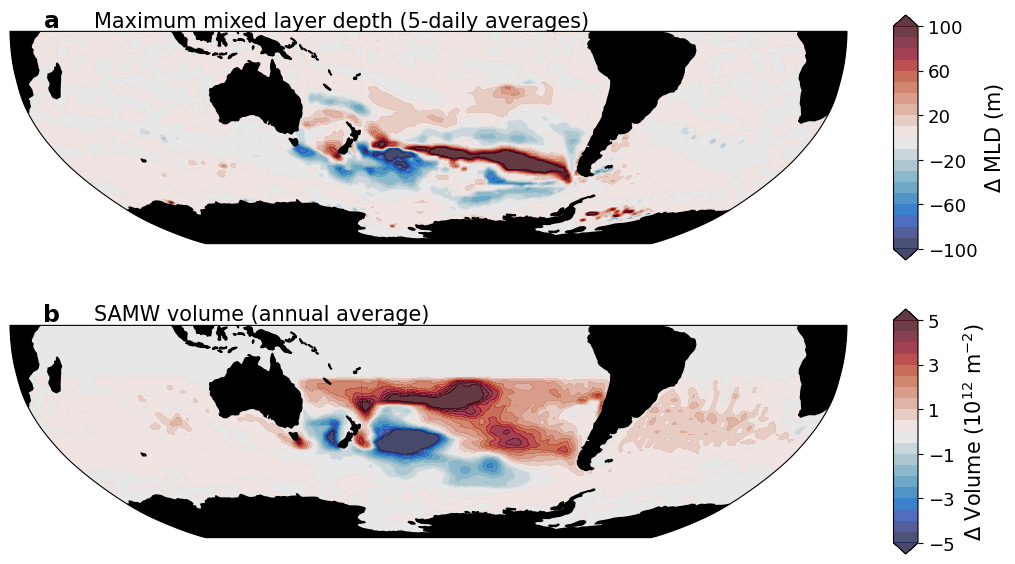

In [23]:

proj = ccrs.Robinson(central_longitude=210)

levs1 = np.arange(-100,101,10)
levs2 = np.arange(-5,5.1,0.5)

colmap1 = lighten(cmo.balance, 0.8)
colmap2 = lighten(cmo.balance, 0.8)
fstic = 13
fslab = 15

fig = plt.figure(figsize=(12,7), facecolor='w')
gs = GridSpec(2,1)

ax1 = plt.subplot(gs[0], projection=proj)
ax2 = plt.subplot(gs[1], projection=proj)

ax1.add_feature(cfeature.LAND, zorder=3, color='k')
ax2.add_feature(cfeature.LAND, zorder=3, color='k')
ax1.set_extent([-180,180,-90,0], crs=ccrs.PlateCarree())
ax2.set_extent([-180,180,-90,0], crs=ccrs.PlateCarree())

depths = samwSEp_volume_atlside.coords['depth']
lats = ds_out['lat'].isel(x=0)

p1 = ax1.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), mldSEp_max_wrapped - mldSWp_max_wrapped, transform=ccrs.PlateCarree(), levels=levs1, cmap=colmap1, vmin=np.min(levs1), vmax=np.max(levs1), extend='both')
p2 = ax2.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), (samwSEp_volume_area_wrapped - samwSWp_volume_area_wrapped)*1e-12, transform=ccrs.PlateCarree(), levels=levs2, cmap=colmap2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')

cbar1 = plt.colorbar(p1, ax=ax1, orientation='vertical', ticks=levs1[::4], fraction=0.05, aspect=10, pad=0.05)
cbar2 = plt.colorbar(p2, ax=ax2, orientation='vertical', ticks=levs2[::4], fraction=0.05, aspect=10, pad=0.05)
cbar1.ax.set_ylabel("$\Delta$ MLD (m)", fontsize=fslab)
cbar2.ax.set_ylabel("$\Delta$ Volume (10$^{12}$ m$^{-2}$)", fontsize=fslab)
cbar1.ax.tick_params(labelsize=fstic)
cbar2.ax.tick_params(labelsize=fstic)

#plt.subplots_adjust(left=0.05, top=0.9, bottom=0.1, hspace=0.4)


xx = 0.05; yy = 1.05
plt.text(xx,yy,'a', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax1.transAxes)
plt.text(xx,yy,'b', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax2.transAxes)

xx = 0.05; yy = 1.05
plt.text(xx*2,yy,"Maximum mixed layer depth (5-daily averages)", fontsize=fslab, va='center', ha='left', transform=ax1.transAxes)
plt.text(xx*2,yy,"SAMW volume (annual average)", fontsize=fslab, va='center', ha='left', transform=ax2.transAxes)


In [123]:
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_Pacific_mld_SAMWvol.png', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_Pacific_mld_SAMWvol.pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_Pacific_mld_SAMWvol_trans.png', dpi=300, bbox_inches='tight', transparent=True)


Text(0.5, 1.25, 'Pacific')

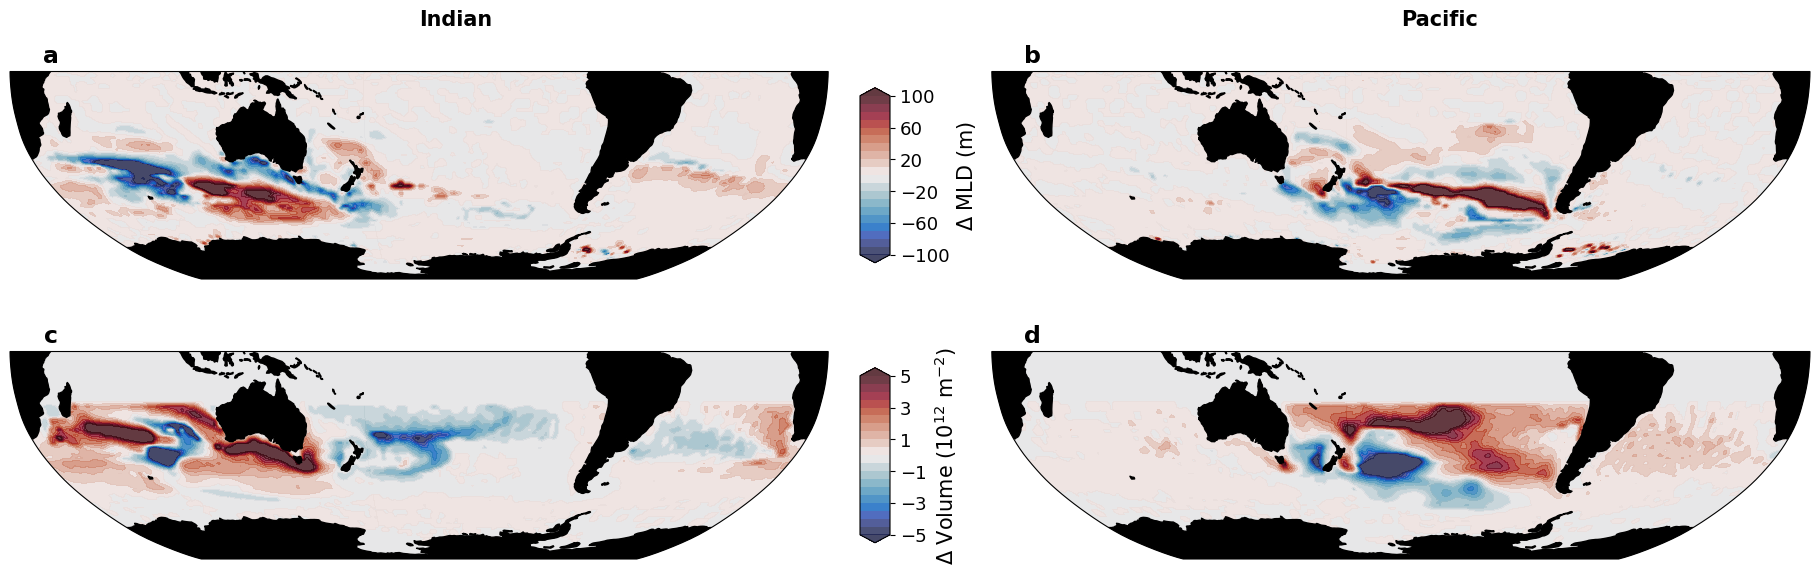

In [25]:

proj = ccrs.Robinson(central_longitude=205)

levs1 = np.arange(-100,101,10)
levs2 = np.arange(-5,5.1,0.5)

colmap1 = lighten(cmo.balance, 0.8)
colmap2 = lighten(cmo.balance, 0.8)
fstic = 13
fslab = 15

fig = plt.figure(figsize=(20,7), facecolor='w')
gs = GridSpec(2,2)

ax1 = plt.subplot(gs[0,0], projection=proj)
ax2 = plt.subplot(gs[0,1], projection=proj)
ax3 = plt.subplot(gs[1,0], projection=proj)
ax4 = plt.subplot(gs[1,1], projection=proj)

ax1.add_feature(cfeature.LAND, zorder=3, color='k')
ax2.add_feature(cfeature.LAND, zorder=3, color='k')
ax3.add_feature(cfeature.LAND, zorder=3, color='k')
ax4.add_feature(cfeature.LAND, zorder=3, color='k')
ax1.set_extent([-180,180,-90,0], crs=ccrs.PlateCarree())
ax2.set_extent([-180,180,-90,0], crs=ccrs.PlateCarree())
ax3.set_extent([-180,180,-90,0], crs=ccrs.PlateCarree())
ax4.set_extent([-180,180,-90,0], crs=ccrs.PlateCarree())

depths = samwSEp_volume_atlside.coords['depth']
lats = ds_out['lat'].isel(x=0)

p1 = ax1.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), mldSEi_max_wrapped - mldSWi_max_wrapped, transform=ccrs.PlateCarree(), levels=levs1, cmap=colmap1, vmin=np.min(levs1), vmax=np.max(levs1), extend='both')
p2 = ax2.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), mldSEp_max_wrapped - mldSWp_max_wrapped, transform=ccrs.PlateCarree(), levels=levs1, cmap=colmap1, vmin=np.min(levs1), vmax=np.max(levs1), extend='both')
p3 = ax3.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), (samwSEi_volume_area_wrapped - samwSWi_volume_area_wrapped)*1e-12, transform=ccrs.PlateCarree(), levels=levs2, cmap=colmap2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
p4 = ax4.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), (samwSEp_volume_area_wrapped - samwSWp_volume_area_wrapped)*1e-12, transform=ccrs.PlateCarree(), levels=levs2, cmap=colmap2, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')

cbax1 = fig.add_axes([0.475,0.575,0.015,0.25])
cbax2 = fig.add_axes([0.475,0.175,0.015,0.25])

cbar1 = plt.colorbar(p1, cax=cbax1, orientation='vertical', ticks=levs1[::4])
cbar2 = plt.colorbar(p3, cax=cbax2, orientation='vertical', ticks=levs2[::4])
cbar1.ax.set_ylabel("$\Delta$ MLD (m)", fontsize=fslab)
cbar2.ax.set_ylabel("$\Delta$ Volume (10$^{12}$ m$^{-2}$)", fontsize=fslab)
cbar1.ax.tick_params(labelsize=fstic)
cbar2.ax.tick_params(labelsize=fstic)

plt.subplots_adjust(left=0.05, top=0.9, bottom=0.1, hspace=0.0, right=0.95)


xx = 0.05; yy = 1.075
plt.text(xx,yy,'a', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax1.transAxes)
plt.text(xx,yy,'b', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax2.transAxes)
plt.text(xx,yy,'c', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax3.transAxes)
plt.text(xx,yy,'d', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax4.transAxes)

xx = 0.5; yy = 1.25
plt.text(xx,yy,"Indian", fontsize=fslab, va='center', ha='left', transform=ax1.transAxes, fontweight='bold')
plt.text(xx,yy,"Pacific", fontsize=fslab, va='center', ha='left', transform=ax2.transAxes, fontweight='bold')


In [103]:
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_Both_mld_SAMWvol.png', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_Both_mld_SAMWvol.pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_Both_mld_SAMWvol_trans.png', dpi=300, bbox_inches='tight', transparent=True)


## do the correlations in SAMW changes between start-end hindcast and pacemaker runs

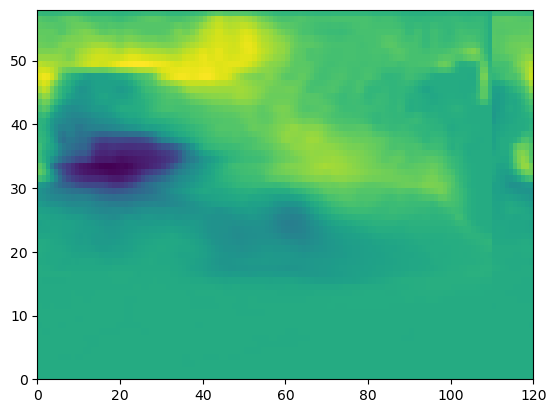

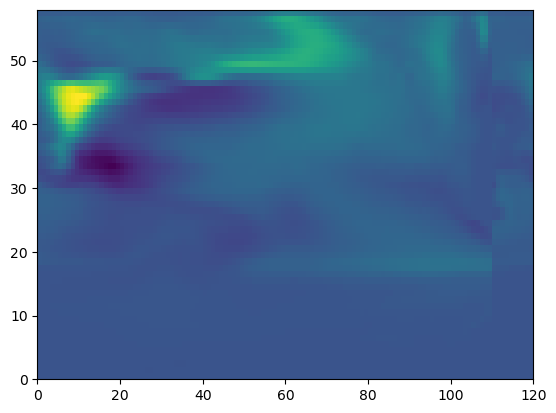

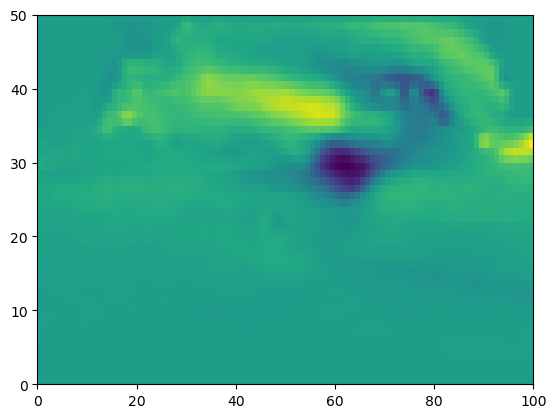

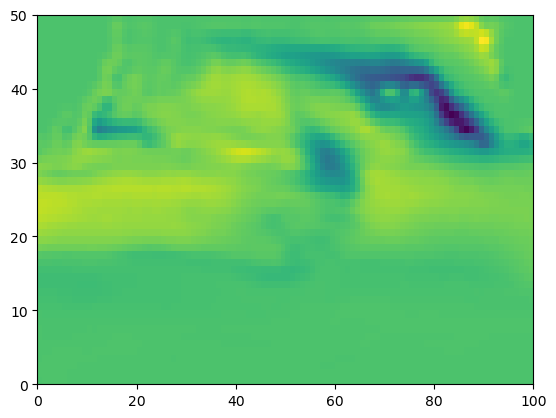

In [26]:
# get changes
samw_hind = samw_volume_end_area - samw_volume_start_area
samwPac_pace = (samwSEp_volume_area - samwSWp_volume_area)
samwInd_pace = (samwSEi_volume_area - samwSWi_volume_area)

# cut the areas
samwPac_hind = samw_hind.where(samw_hind.coords['lon'] < -70.0, other=0.0) + samw_hind.where(samw_hind.coords['lon'] > 170.0, other=0.0)
samwInd_hind = samw_hind.where(samw_hind.coords['lon'] < 120.0, other=0.0).where(samw_hind.coords['lon'] > 20.0, other=0.0)
samwPac_pace = samwPac_pace.where(samwPac_pace.coords['lon'] < -70.0, other=0.0) + samwPac_pace.where(samwPac_pace.coords['lon'] > 170.0, other=0.0)
samwInd_pace = samwInd_pace.where(samwInd_pace.coords['lon'] < 120.0, other=0.0).where(samwInd_pace.coords['lon'] > 20.0, other=0.0)

# drop the regions outside our area of interest
samwPac_hind = samwPac_hind.where(samwPac_hind != 0.0, drop=True)
samwInd_hind = samwInd_hind.where(samwInd_hind != 0.0, drop=True)
samwPac_pace = samwPac_pace.where(samwPac_pace != 0.0, drop=True)
samwInd_pace = samwInd_pace.where(samwInd_pace != 0.0, drop=True)

# add back the zeros 
samwPac_hind = samwPac_hind.fillna(0.0)
samwInd_hind = samwInd_hind.fillna(0.0)
samwPac_pace = samwPac_pace.fillna(0.0)
samwInd_pace = samwInd_pace.fillna(0.0)

plt.figure()
plt.pcolormesh(samwPac_pace)
plt.figure()
plt.pcolormesh(samwPac_hind)

plt.figure()
plt.pcolormesh(samwInd_pace)
plt.figure()
plt.pcolormesh(samwInd_hind)


In [29]:

### perform the correlation computation
from scipy.stats import pearsonr

### to avoid spatial autocorrelation, randomly select from the arrays
corr_Pac = np.zeros(1000)
corr_Ind = np.zeros(1000)
p_val_Pac = np.zeros(1000)
p_val_Ind = np.zeros(1000)

# Randomly select 1000 indices from the range of 5000
for ii in np.arange(1000):
    np.random.seed(ii)  # Optional: Set a seed for reproducibility
    indPac = np.random.choice(len(samwPac_hind.values.flatten()), size=1000, replace=False)
    indInd = np.random.choice(len(samwInd_hind.values.flatten()), size=1000, replace=False)

    hindPac = samwPac_hind.values.flatten()[indPac] * 1e-12
    hindInd = samwInd_hind.values.flatten()[indInd] * 1e-12
    pacePac = samwPac_pace.values.flatten()[indPac] * 1e-12
    paceInd = samwInd_pace.values.flatten()[indInd] * 1e-12
    
    corr_Pac[ii], p_val_Pac[ii] = pearsonr(hindPac, pacePac)
    corr_Ind[ii], p_val_Ind[ii] = pearsonr(hindInd, paceInd)



Mean correlation for Pacific and Indian 0.3838974448860328 0.42137805839287873


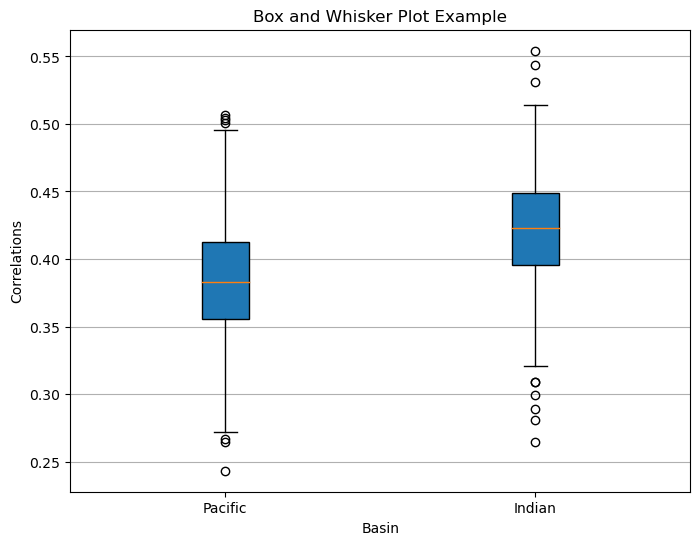

In [30]:

# Create a box and whisker plot
plt.figure(figsize=(8, 6))
plt.boxplot([corr_Pac, corr_Ind], patch_artist=True, labels=["Pacific", "Indian"])

# Customize the plot
plt.title("Box and Whisker Plot Example")
plt.ylabel("Correlations")
plt.xlabel("Basin")
plt.grid(axis="y")

print("Mean correlation for Pacific and Indian", np.mean(corr_Pac), np.mean(corr_Ind))